In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Homework

The quality of classification/regression by the k Nearest Neighbors method depends on several parameters:
* the number of neighbors `n_neighbors`
* the distance metric between objects `metric`
* the weights of neighbors (the neighbors of the test example can enter with different weights, for example, the further the example, the less its "voice" is taken into account) `weights`


In [82]:
all_data = pd.read_csv('forest_dataset.csv')
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [83]:
all_data.shape

(10000, 55)

In [84]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values
train_feature_matrix,test_feature_matrix,train_labels,test_labels = train_test_split(feature_matrix,labels,test_size=0.2,random_state=42)

Train the `KNeighborsClassifier` on the dataset.

In [85]:
clf = KNeighborsClassifier()
clf.fit(train_feature_matrix,train_labels)

pred_labels=clf.predict(test_feature_matrix)
accuracy=accuracy_score(test_labels,pred_labels)
accuracy

0.7365

Let's select the parameters of our model:

* Iterate over the grid from `1` to `10` for the number of neighbors parameter
* Also, try using different metrics: `['manhattan', 'euclidean']`
* Try using different weight calculation strategies: `[‘uniform’, ‘distance’]`

In [86]:
params = {"n_neighbors" : range(1,11) ,"metric" : ['manhattan', 'euclidean'],"weights" : ['uniform', 'distance']}

clf_grid = GridSearchCV(clf, params, cv=3, scoring='accuracy', n_jobs=-1, verbose = 3)
clf_grid.fit(train_feature_matrix, train_labels)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': range(1, 11),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

Let's output the best parameters

In [87]:
clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

Using the optimal number of neighbors found, calculate the probabilities of belonging to classes for the test sample (`.predict_proba`).

In [88]:
optimal_clf = clf_grid.best_estimator_

optimal_clf.fit(train_feature_matrix, train_labels)

pred_prob = optimal_clf.predict_proba(test_feature_matrix)

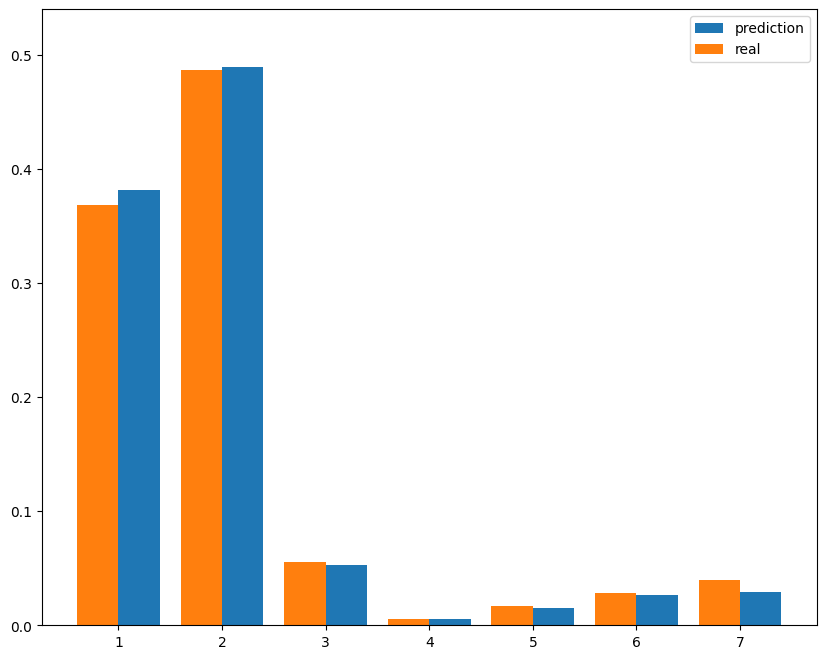

In [89]:

unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

## Conclusion

What is the quality of the model on the test sample? Compare it with the quality of logistic regression. Which model is better? Why? What are the pros and cons of the k Nearest Neighbors method? Plot the ROC curve for the k Nearest Neighbors method. Calculate the area under the ROC curve (AUC-ROC). \\
Каково качество модели на тестовой выборке? Сравните ее с качеством логистической регрессии. Какая модель лучше? Почему? Каковы плюсы и минусы метода k ближайших соседей? Постройте кривую ROC для метода k ближайших соседей. Рассчитайте площадь под кривой ROC (AUC-ROC).

In [90]:

y_pred = clf_grid.predict(test_feature_matrix)
accuracy = accuracy_score(test_labels, y_pred)
print("KNN", accuracy)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_feature_matrix)
X_test_scaled = scaler.transform(test_feature_matrix)


model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, train_labels)


accuracy = model.score(X_test_scaled, test_labels)
print("log_regres", accuracy)

KNN 0.785
log_regres 0.718


**KNN** \\
*Достоинства:*


*   Не требует сложных вычислений при обучении
*   Не предполагает линейной зависимости

*Недостатки:*

*   Чувствительность к шуму и выбросам
*   Медлененный на больших данных, потому что хранит всю обучающую выборку \\

**Логистическая регрессия** \\
*Достоинства:*

*   Быстрая работа

*   Можно анализировать влияние признаков через коэффициенты \\

*Недостатки:*


*   Плохо работает на сложных нелинейных данных










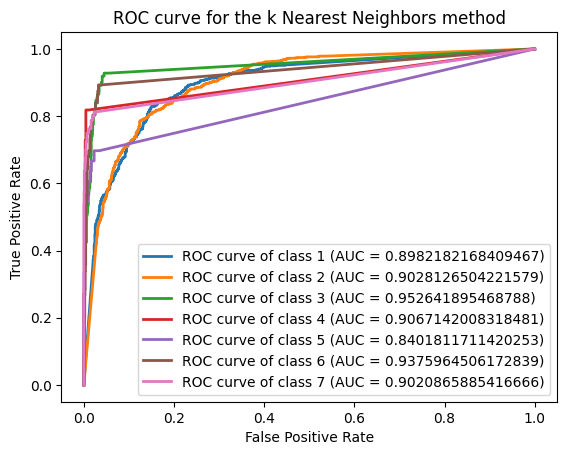

In [91]:
fpr = []
tpr = []
roc_auc = []

for i in range(len(optimal_clf.classes_)):
    f, t, _ = roc_curve(test_labels, pred_prob[:, i], pos_label = i + 1)
    r = auc(f, t)
    fpr.append(f)
    tpr.append(t)
    roc_auc.append(r)

plt.figure()
for i in range(len(optimal_clf.classes_)):
    plt.plot(fpr[i], tpr[i], lw = 2, label = f'ROC curve of class {i+1} (AUC = {roc_auc[i]})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for the k Nearest Neighbors method')
plt.legend()
plt.show()